## **Aula 1: Preparando e processando os dados**

### **Importando os dados**

> Você pode checar a documentação da biblioteca Pandas [aqui](https://pandas.pydata.org/).

In [28]:
import pandas as pd

In [198]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [30]:
df.head()

data_hora  contagem  temperatura  sensacao_termica  umidade  \
0  2015-01-04 00:00:00       182          3.0               2.0     93.0   
1  2015-01-04 01:00:00       138          NaN               NaN     93.0   
2  2015-01-04 02:00:00       134          2.5               2.5     96.5   
3  2015-01-04 03:00:00        72          2.0               2.0    100.0   
4  2015-01-04 04:00:00        47          NaN               NaN     93.0   

   velocidade_vento      clima feriado fim_de_semana  estacao  
0               6.0    Nublado     Não           Sim  Inverno  
1               5.0  Céu limpo     Não           Sim  Inverno  
2               0.0  Céu limpo     Não           Sim  Inverno  
3               0.0  Céu limpo     Não           Sim  Inverno  
4               6.5  Céu limpo     Não           Sim  Inverno

### **Tratando dados nulos**

In [31]:
df.shape

(17429, 10)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [33]:
df.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

>Você pode encontrar informações detalhadas sobre o método *interpolate()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

In [34]:
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [35]:
df.head(10)

data_hora  contagem  temperatura  sensacao_termica  umidade  \
0  2015-01-04 00:00:00       182         3.00              2.00     93.0   
1  2015-01-04 01:00:00       138         2.75              2.25     93.0   
2  2015-01-04 02:00:00       134         2.50              2.50     96.5   
3  2015-01-04 03:00:00        72         2.00              2.00    100.0   
4  2015-01-04 04:00:00        47         2.00              2.00     93.0   
5  2015-01-04 05:00:00        46         2.00              2.00     93.0   
6  2015-01-04 06:00:00        51         1.00             -1.00    100.0   
7  2015-01-04 07:00:00        75         1.00             -1.00    100.0   
8  2015-01-04 08:00:00       131         1.50             -1.00     96.5   
9  2015-01-04 09:00:00       301         2.00             -0.50    100.0   

   velocidade_vento                 clima feriado fim_de_semana  estacao  
0               6.0               Nublado     Não           Sim  Inverno  
1               5.0             Céu limpo     Não           Sim  Inverno  
2               0.0             Céu limpo     Não           Sim  Inverno  
3               0.0             Céu limpo     Não           Sim  Inverno  
4               6.5             Céu limpo     Não           Sim  Inverno  
5               4.0             Céu limpo     Não           Sim  Inverno  
6               7.0  Parcialmente nublado     Não           Sim  Inverno  
7               7.0  Parcialmente nublado     Não           Sim  Inverno  
8               8.0  Parcialmente nublado     Não           Sim  Inverno  
9               9.0               Nublado     Não           Sim  Inverno

### **Identificando e removendo dados duplicados**

In [36]:
df.duplicated().sum()

15

In [37]:
# Identificando as linhas duplicadas no DataFrame
duplicatas = df.duplicated(keep=False)

# Selecionando as linhas duplicadas com base no resultado anterior
linhas_duplicadas = df[duplicatas]

# Ordenando as linhas duplicadas pela coluna 'data_hora'
linhas_duplicadas.sort_values(by='data_hora')

data_hora  contagem  temperatura  sensacao_termica  umidade  \
519    2015-01-25 16:00:00      1238          8.0               5.0     71.0   
17422  2015-01-25 16:00:00      1238          8.0               5.0     71.0   
869    2015-02-09 06:00:00       479          5.0               3.5     87.0   
17417  2015-02-09 06:00:00       479          5.0               3.5     87.0   
3655   2015-06-05 18:00:00      3411         23.0              23.0     50.0   
17425  2015-06-05 18:00:00      3411         23.0              23.0     50.0   
4167   2015-06-27 02:00:00       337         15.5              15.5     74.5   
17421  2015-06-27 02:00:00       337         15.5              15.5     74.5   
4658   2015-07-17 14:00:00      1882         24.5              24.5     44.0   
17418  2015-07-17 14:00:00      1882         24.5              24.5     44.0   
17428  2015-08-15 23:00:00       759         17.0              17.0     59.0   
5360   2015-08-15 23:00:00       759         17.0              17.0     59.0   
17426  2015-12-12 11:00:00      1100         12.0              12.0     82.0   
8174   2015-12-12 11:00:00      1100         12.0              12.0     82.0   
17420  2015-12-12 12:00:00      1308         13.0              13.0     77.0   
8175   2015-12-12 12:00:00      1308         13.0              13.0     77.0   
17415  2015-12-27 05:00:00        57         15.0              15.0     72.0   
8528   2015-12-27 05:00:00        57         15.0              15.0     72.0   
17427  2016-02-02 17:00:00      2846          8.0               4.5     59.5   
9428   2016-02-02 17:00:00      2846          8.0               4.5     59.5   
17414  2016-05-06 03:00:00        77          9.5               9.0     79.0   
11646  2016-05-06 03:00:00        77          9.5               9.0     79.0   
12350  2016-06-04 11:00:00      1779         15.5              15.5     85.5   
17419  2016-06-04 11:00:00      1779         15.5              15.5     85.5   
12443  2016-06-08 08:00:00      4672         18.0              18.0     83.0   
17416  2016-06-08 08:00:00      4672         18.0              18.0     83.0   
17424  2016-12-11 10:00:00      1098          7.5               4.5     87.0   
16848  2016-12-11 10:00:00      1098          7.5               4.5     87.0   
17423  2016-12-23 02:00:00        92          7.5               5.5     90.0   
17128  2016-12-23 02:00:00        92          7.5               5.5     90.0   

       velocidade_vento                 clima feriado fim_de_semana    estacao  
519                18.0               Nublado     Não           Sim    Inverno  
17422              18.0               Nublado     Não           Sim    Inverno  
869                 6.5  Parcialmente nublado     Não           Não    Inverno  
17417               6.5  Parcialmente nublado     Não           Não    Inverno  
3655               26.0  Parcialmente nublado     Não           Não      Verão  
17425              26.0  Parcialmente nublado     Não           Não      Verão  
4167               18.0  Parcialmente nublado     Não           Sim      Verão  
17421              18.0  Parcialmente nublado     Não           Sim      Verão  
4658               29.5  Parcialmente nublado     Não           Não      Verão  
17418              29.5  Parcialmente nublado     Não           Não      Verão  
17428               6.0             Céu limpo     Não           Sim      Verão  
5360                6.0             Céu limpo     Não           Sim      Verão  
17426              20.0            Chuva leve     Não           Sim    Inverno  
8174               20.0            Chuva leve     Não           Sim    Inverno  
17420              26.0            Chuva leve     Não           Sim    Inverno  
8175               26.0            Chuva leve     Não           Sim    Inverno  
17415              31.0  Parcialmente nublado     Não           Sim    Inverno  
8528               31.0  Parcialmente nublado     Não           Sim    Inverno

>Você pode encontrar informações detalhadas sobre o método *drop_duplicates()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html).

In [38]:
df_limpo = df.drop_duplicates()

In [39]:
df_limpo.shape

(17414, 10)

In [40]:
maximo = df_limpo[['temperatura','sensacao_termica']].max()

In [41]:
minimo = df_limpo[['temperatura','sensacao_termica']].min()

In [42]:
print(minimo, '\n',maximo)

temperatura        -1.5
sensacao_termica   -6.0
dtype: float64 
 temperatura         34.0
sensacao_termica    34.0
dtype: float64


In [43]:
df_limpo.describe()

contagem   temperatura  sensacao_termica       umidade  \
count  17414.000000  17414.000000      17414.000000  17414.000000   
mean    1143.101642     12.468206         11.521080     72.324954   
std     1085.108068      5.571670          6.614799     14.313186   
min        0.000000     -1.500000         -6.000000     20.500000   
25%      257.000000      8.000000          6.000000     63.000000   
50%      844.000000     12.500000         12.500000     74.500000   
75%     1671.750000     16.000000         16.000000     83.000000   
max     7860.000000     34.000000         34.000000    100.000000   

       velocidade_vento  
count      17414.000000  
mean          15.913063  
std            7.894570  
min            0.000000  
25%           10.000000  
50%           15.000000  
75%           20.500000  
max           56.500000

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


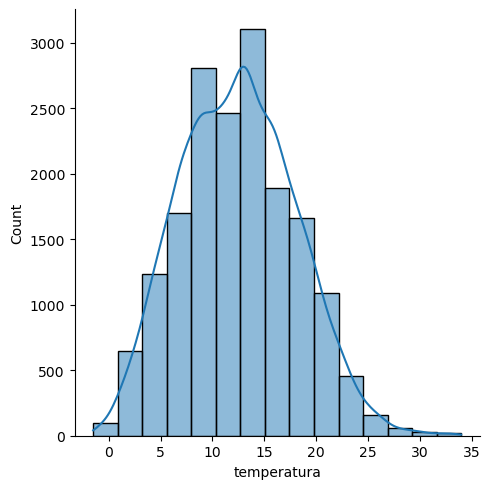

In [45]:
sns.displot(df_limpo, x = 'temperatura', bins=15, kde= True)

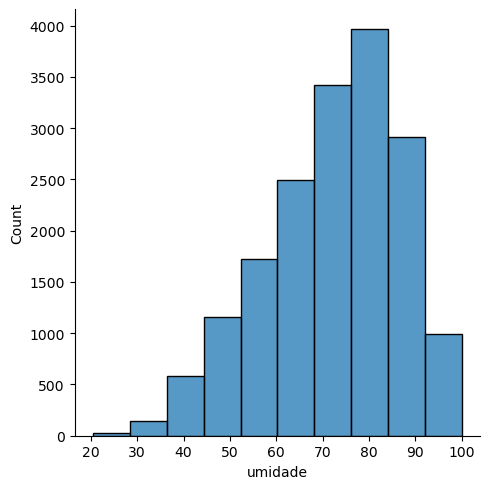

In [46]:
sns.displot(df_limpo, x='umidade', bins = 10)

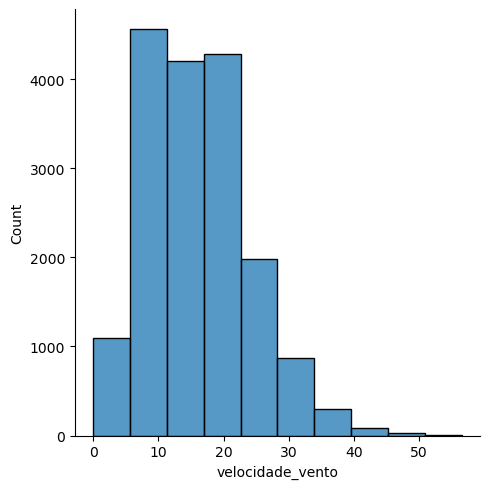

In [47]:
sns.displot(df_limpo, x='velocidade_vento', bins = 10)

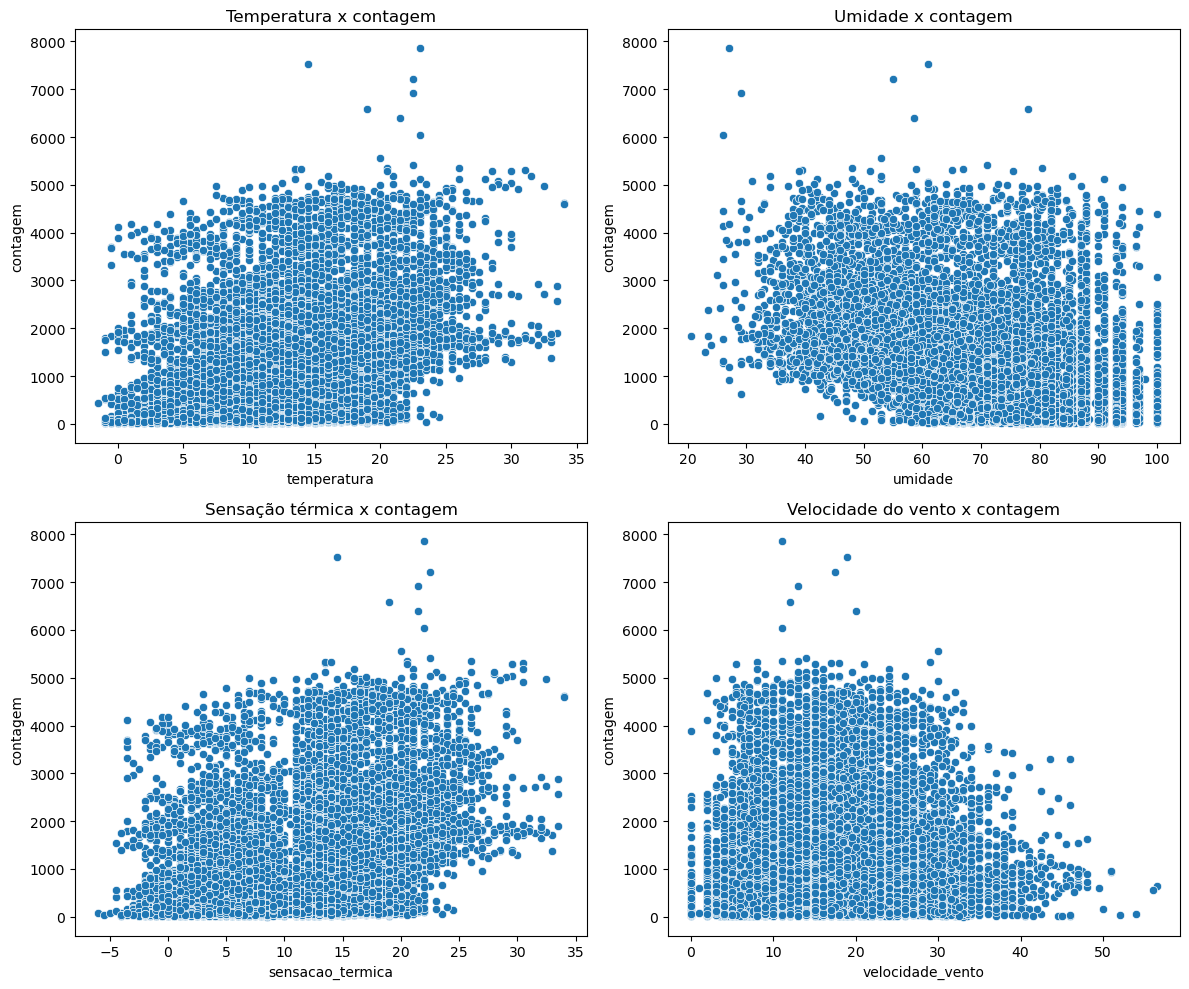

In [48]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

sns.scatterplot(ax = axes[0,0], data = df_limpo, x='temperatura', y='contagem')
sns.scatterplot(ax = axes[0,1], data = df_limpo, x='umidade', y='contagem')
sns.scatterplot(ax = axes[1,0], data = df_limpo, x='sensacao_termica', y='contagem')
sns.scatterplot(ax = axes[1,1], data = df_limpo, x='velocidade_vento', y='contagem')

axes[0,0].set_title('Temperatura x contagem')
axes[0,1].set_title('Umidade x contagem')
axes[1,0].set_title('Sensação térmica x contagem')
axes[1,1].set_title('Velocidade do vento x contagem')

plt.tight_layout()

<Axes: >

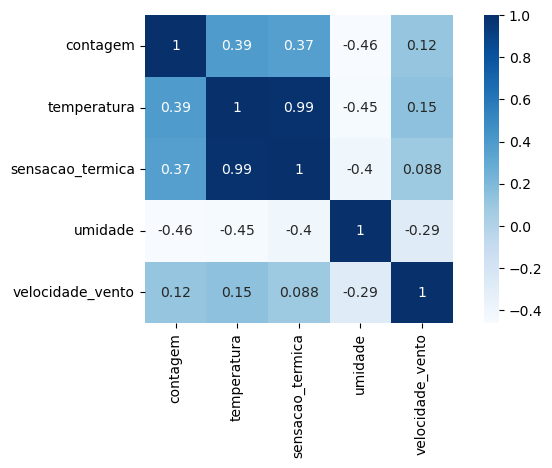

In [49]:
plt.figure(figsize=(8,4))

sns.heatmap(df_limpo.corr(numeric_only=True), annot = True, cmap='Blues', square = True)


In [50]:
corr  = df_limpo.corr(numeric_only=True)

<Axes: >

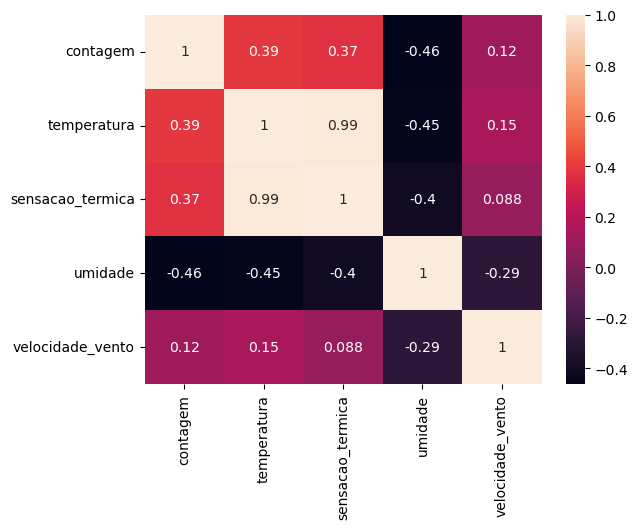

In [51]:
sns.heatmap(corr, annot = True)

In [52]:
df_limpo.describe(include = [object])

data_hora      clima feriado fim_de_semana    estacao
count                 17414      17414   17414         17414      17414
unique                17414          6       2             2          4
top     2015-01-04 00:00:00  Céu limpo     Não           Não  Primavera
freq                      1       6150   17030         12444       4394

In [53]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
    print(df_limpo[col].value_counts())
    print('-'*40)
    

clima
Céu limpo               6150
Parcialmente nublado    5498
Nublado                 3551
Chuva leve              2141
Neve                      60
Chuva com trovoadas       14
Name: count, dtype: int64
----------------------------------------
feriado
Não    17030
Sim      384
Name: count, dtype: int64
----------------------------------------
fim_de_semana
Não    12444
Sim     4970
Name: count, dtype: int64
----------------------------------------
estacao
Primavera    4394
Verão        4387
Inverno      4330
Outono       4303
Name: count, dtype: int64
----------------------------------------


Text(0, 0.5, 'Número de aluguéis')

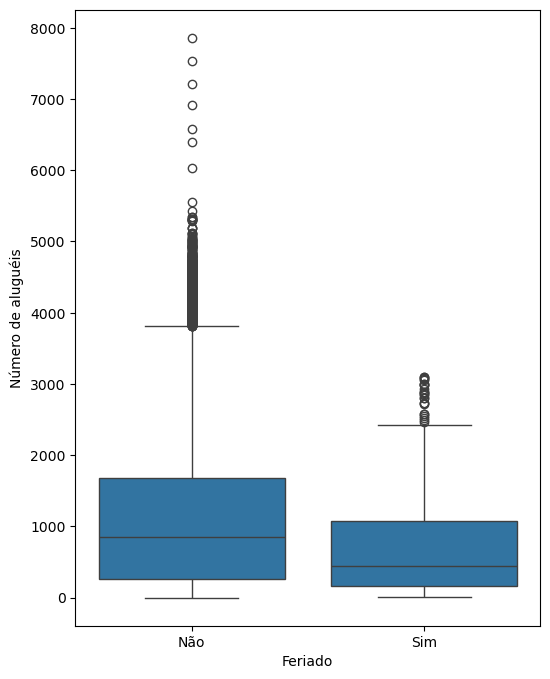

In [54]:
plt.figure(figsize = (6,8))

sns.boxplot(df_limpo, x='feriado', y='contagem')
plt.xlabel ('Feriado')
plt.ylabel('Número de aluguéis')


Text(0, 0.5, 'Número de aluguéis')

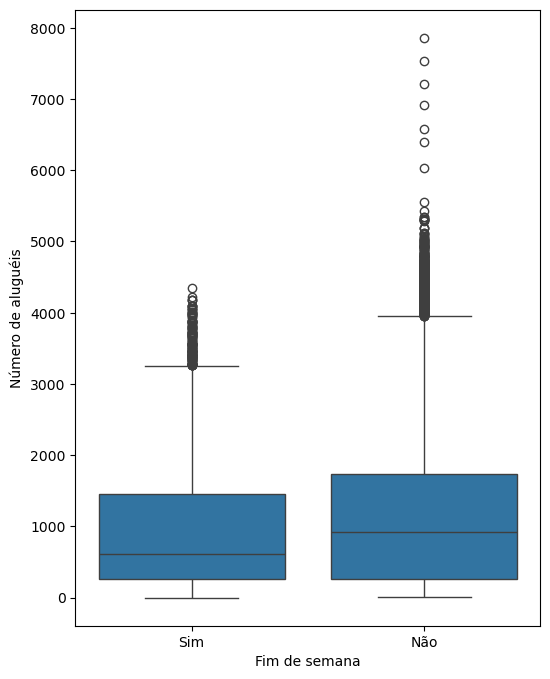

In [55]:
plt.figure(figsize = (6,8))

sns.boxplot(df_limpo, x='fim_de_semana', y='contagem')
plt.xlabel ('Fim de semana')
plt.ylabel('Número de aluguéis')

In [56]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [57]:
print(mediana_feriado)
print('=' *60)
print(mediana_fim_de_semana)

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64
fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64


In [58]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by = 'contagem', ascending = False)

In [59]:
df_c = df_limpo['clima'].value_counts().reset_index()

In [60]:
df_clima = df_clima.merge(df_c, on = 'clima')
df_clima['media'] = df_clima['contagem']/df_clima['count']

In [61]:
df_clima.rename(columns = {'count':'qtde_dias'}, inplace=True)

In [62]:
df_clima

clima  contagem  qtde_dias        media
0             Céu limpo   7146847       6150  1162.088943
1  Parcialmente nublado   6965558       5498  1266.925791
2               Nublado   4243887       3551  1195.124472
3            Chuva leve   1526461       2141   712.966371
4                  Neve     15051         60   250.850000
5   Chuva com trovoadas      8168         14   583.428571

<Axes: xlabel='contagem', ylabel='clima'>

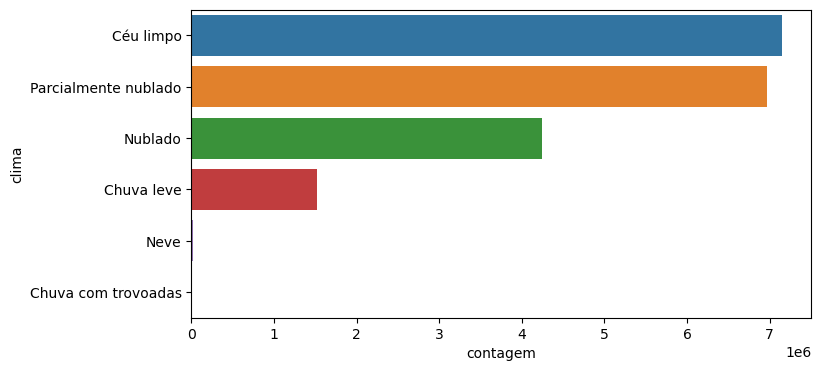

In [63]:
plt.figure(figsize = (8,4))

sns.barplot(df_clima, x='contagem', y='clima', hue = 'clima', orient = 'h')

<Axes: xlabel='media', ylabel='clima'>

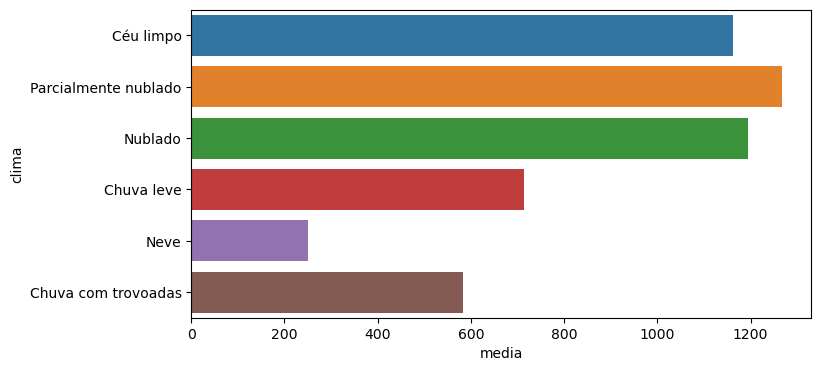

In [64]:
plt.figure(figsize = (8,4))

sns.barplot(df_clima, x='media', y='clima', hue = 'clima', orient = 'h')

<Axes: xlabel='contagem', ylabel='estacao'>

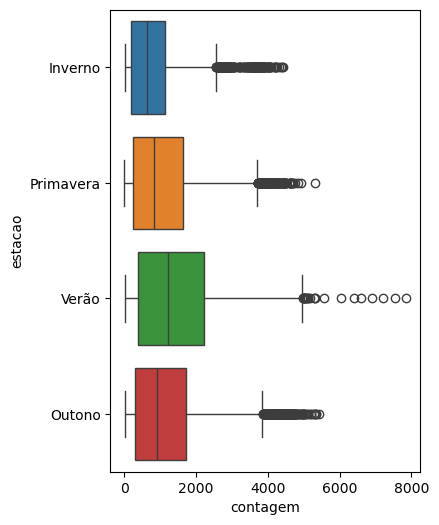

In [65]:
plt.figure(figsize=(4,6))

sns.boxplot(df_limpo, x='contagem',  y='estacao', hue = 'estacao', orient = 'h')

In [66]:
df_limpo.groupby('estacao')['contagem'].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

In [67]:
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

In [68]:
stats, p_value = mannwhitneyu(primavera, outono, alternative = 'two-sided')
#H0 = Amostras são semelhantes
#H1 = Amostras são diferentes
if p_value < 0.05:
    print('Rejeita H0, então as amostras são diferentes')
else:
    print('Não rejeita H0, não há evidências de amostras serem diferentes')

Rejeita H0, então as amostras são diferentes


In [69]:
import numpy as np

df_data = df_limpo.copy()

In [70]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 2.0+ MB


In [71]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour
df_data.head()

data_hora  contagem  temperatura  sensacao_termica  umidade  \
0 2015-01-04 00:00:00       182         3.00              2.00     93.0   
1 2015-01-04 01:00:00       138         2.75              2.25     93.0   
2 2015-01-04 02:00:00       134         2.50              2.50     96.5   
3 2015-01-04 03:00:00        72         2.00              2.00    100.0   
4 2015-01-04 04:00:00        47         2.00              2.00     93.0   

   velocidade_vento      clima feriado fim_de_semana  estacao  mes  horario  
0               6.0    Nublado     Não           Sim  Inverno    1        0  
1               5.0  Céu limpo     Não           Sim  Inverno    1        1  
2               0.0  Céu limpo     Não           Sim  Inverno    1        2  
3               0.0  Céu limpo     Não           Sim  Inverno    1        3  
4               6.5  Céu limpo     Não           Sim  Inverno    1        4

In [72]:
df_data['data_hora'] = df_data['data_hora'].dt.date
df_data.rename(columns = {'data_hora':'data'}, inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [73]:
df_data['data'] = pd.to_datetime(df_data['data'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


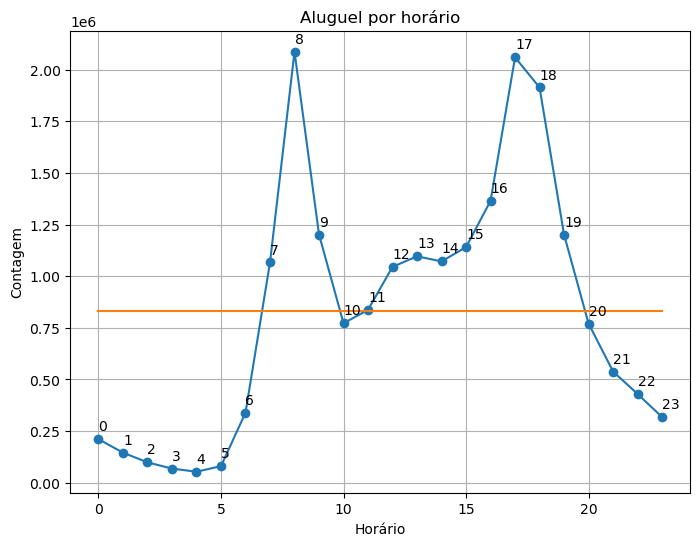

In [74]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,6))
plt.plot(df_por_hora['horario'], df_por_hora['contagem'], marker='o')
for x, y, horario in zip(df_por_hora['horario'], df_por_hora['contagem']+0.05*df_por_hora['contagem'].mean(), df_por_hora['horario']):
    plt.text(x,y,horario)
plt.plot(df_por_hora['horario'], [df_por_hora['contagem'].mean() for i in range(len(df_por_hora))])
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.title('Aluguel por horário')
plt.grid()
plt.show()

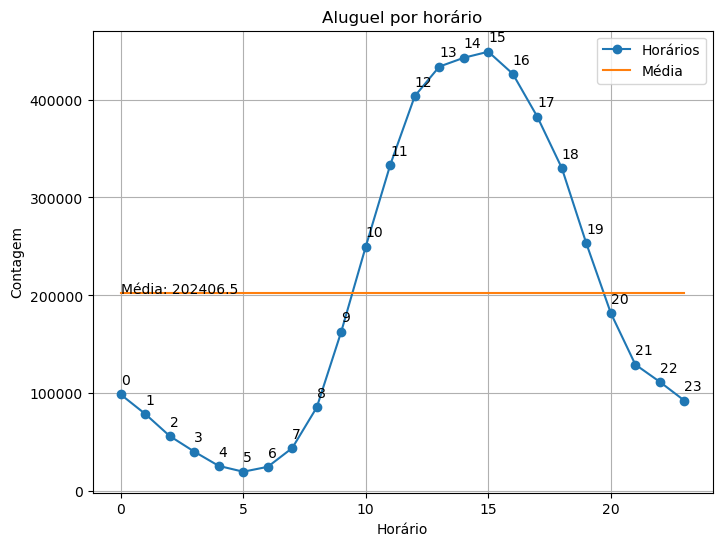

In [75]:
df_fim_de_semana = df_data[df_data['fim_de_semana']=='Sim']

alugueis_fds = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,6))
plt.plot(alugueis_fds['horario'], alugueis_fds['contagem'], marker='o', label = 'Horários')
for x, y, horario in zip(alugueis_fds['horario'], alugueis_fds['contagem']+0.05*alugueis_fds['contagem'].mean(), alugueis_fds['horario']):
    plt.text(x,y,horario)
plt.plot(alugueis_fds['horario'], [alugueis_fds['contagem'].mean() for i in range(len(alugueis_fds))], label = 'Média')
plt.legend()
plt.text(alugueis_fds['horario'].min(), alugueis_fds['contagem'].mean(), f'Média: {alugueis_fds.contagem.mean()}')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.title('Aluguel por horário')
plt.grid()
plt.show()

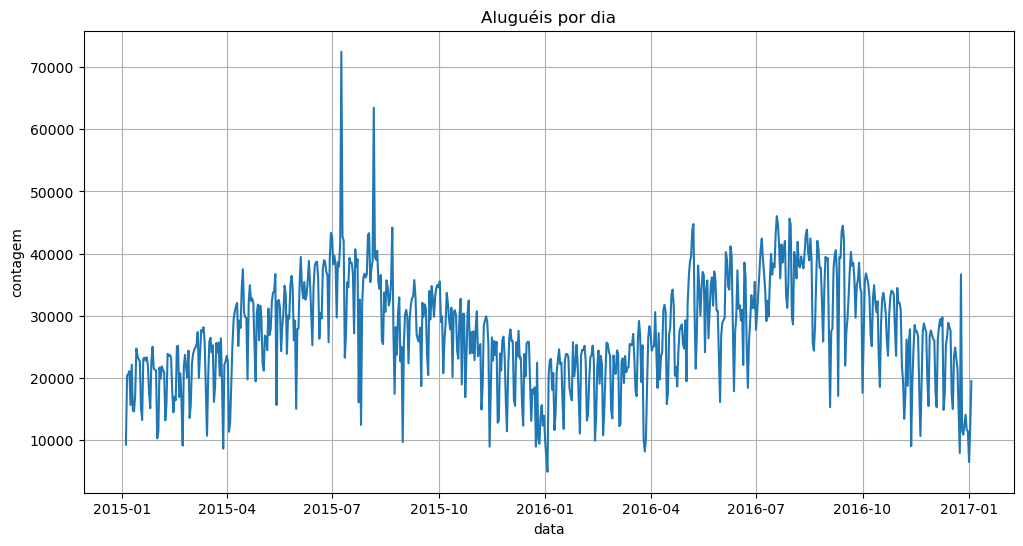

In [76]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(df_tempo, x = 'data', y='contagem')
plt.title('Aluguéis por dia')
plt.grid()
plt.show()

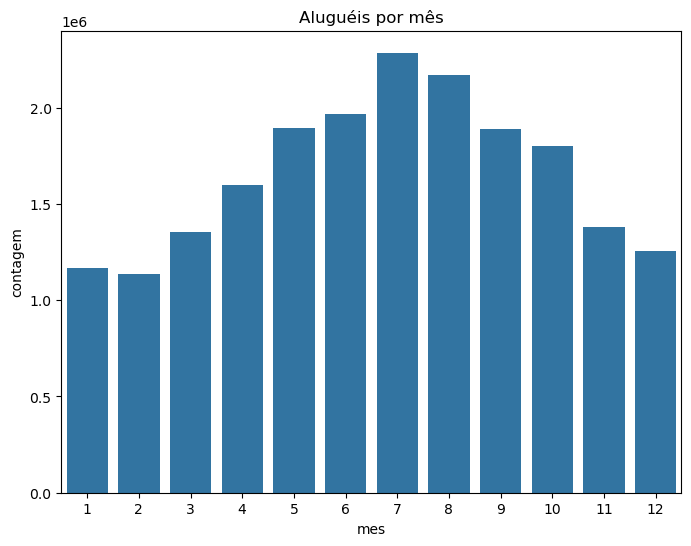

In [77]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

plt.figure(figsize = (8,6))
sns.barplot(alugueis_mensais, x = 'mes', y = 'contagem')
plt.title('Aluguéis por mês')
plt.show()

In [78]:
df_tempo['mes'] = df_tempo['data'].dt.to_period('M')


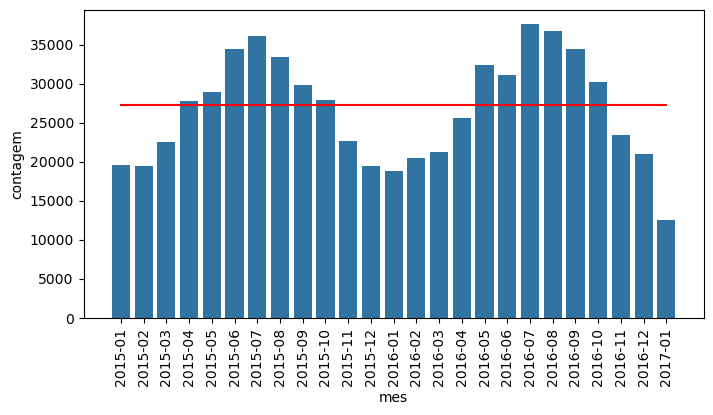

In [79]:
plt.figure(figsize = (8,4))

sns.barplot(df_tempo, x= df_tempo['mes'], y=df_tempo['contagem'], errorbar = None)
plt.plot(df_tempo['mes'].astype('string'), [df_tempo['contagem'].mean() for i in range(len(df_tempo))], color='r')
plt.xticks(rotation = 90)

       


plt.show()

In [84]:
from prophet import Prophet

In [85]:
df_prophet = df_data[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'})

df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet.head()

np.random.seed(4587)
# Instanciando o modelo Prophet
modelo = Prophet()

# Treinando o modelo
modelo.fit(df_prophet)

# Criando um dataframe para previsões futuras por 90 dias
futuro = modelo.make_future_dataframe(periods=90, freq='D')

#Realizando a previsão
previsao = modelo.predict(futuro)


17:06:24 - cmdstanpy - INFO - Chain [1] start processing
17:06:24 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


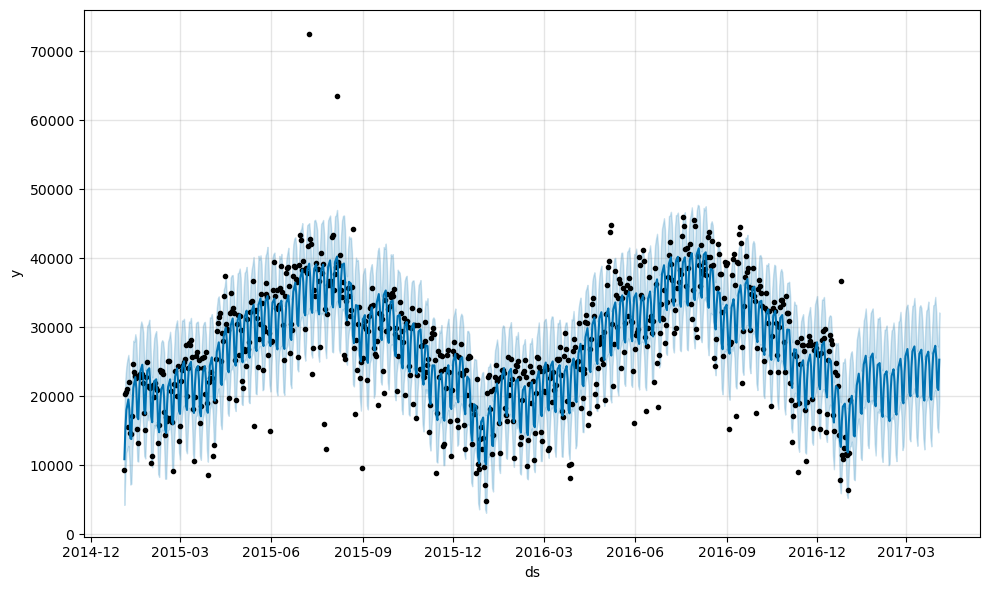

In [87]:
fig1 = modelo.plot(previsao)

In [89]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2015-01-04  10867.436698   4248.681464  17121.906796
1   2015-01-05  15279.441783   8890.570729  22594.402077
2   2015-01-06  17984.434533  11808.797686  24375.208227
3   2015-01-07  18716.667970  12325.180844  25327.444016
4   2015-01-08  19529.925007  12793.113904  25988.199728
..         ...           ...           ...           ...
815 2017-03-30  27303.158028  20890.868485  34391.306911
816 2017-03-31  25530.545826  19354.636545  32029.859379
817 2017-04-01  21214.278115  15449.716281  27696.529702
818 2017-04-02  20897.149453  14749.799059  27208.615968
819 2017-04-03  25289.753107  19196.623812  32137.091874

[820 rows x 4 columns]

C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

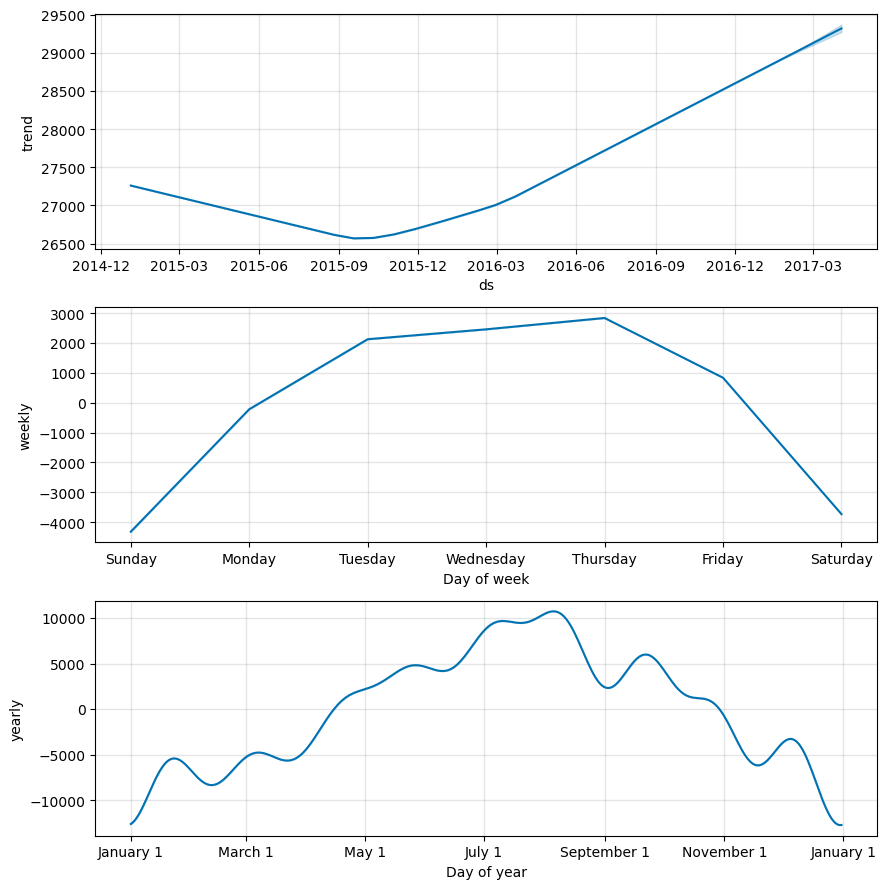

In [90]:
#prophet é um modelo de regressão aditivo

fig2 = modelo.plot_components(previsao)

In [92]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]

df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet ['y'][584:]

In [93]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

20:07:58 - cmdstanpy - INFO - Chain [1] start processing
20:07:58 - cmdstanpy - INFO - Chain [1] done processing


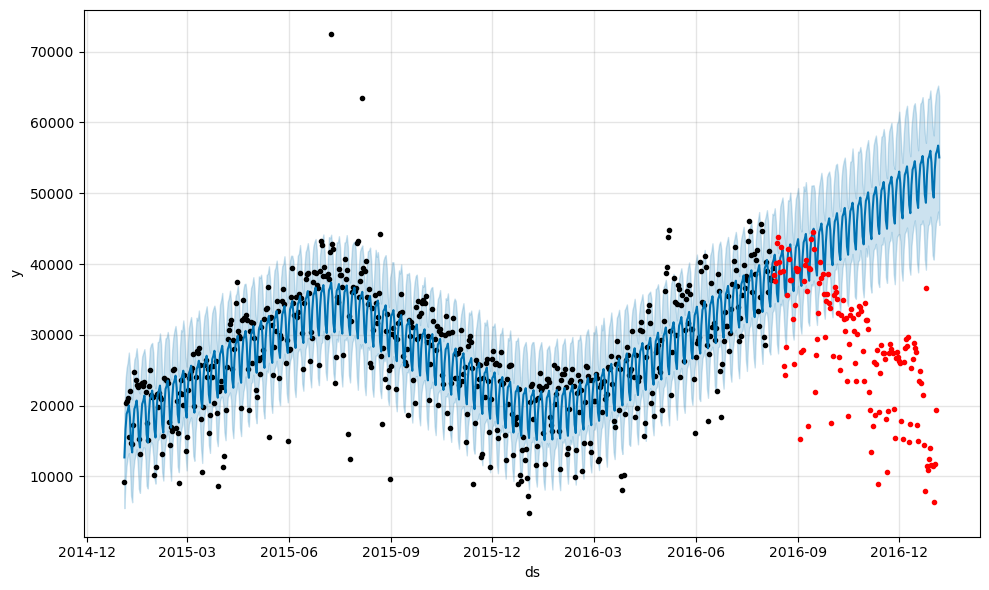

In [96]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


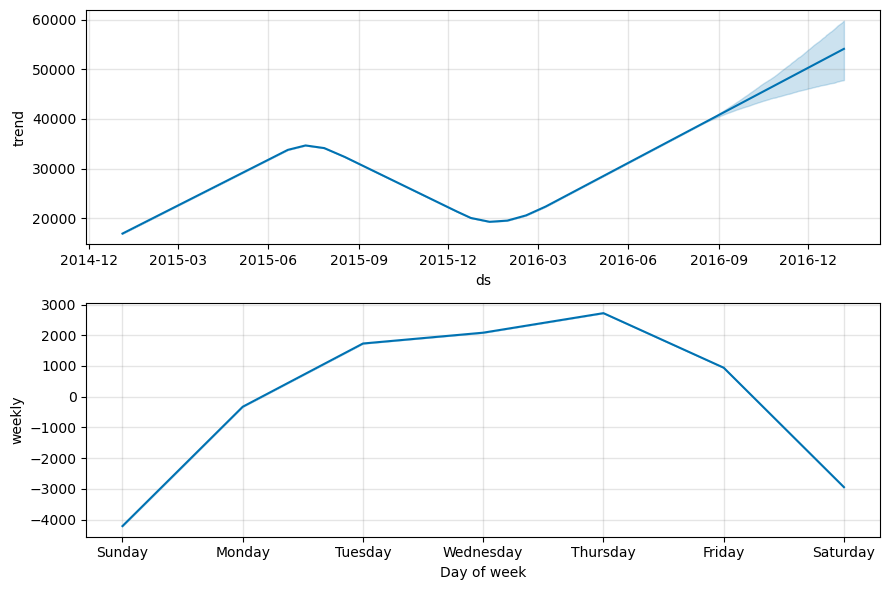

In [97]:
fig2 = modelo.plot_components(previsao)

In [100]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

ds          yhat      y
0   2016-08-10  40578.718163  38430
1   2016-08-11  41319.073556  37626
2   2016-08-12  39648.849935  40159
3   2016-08-13  35867.643110  43041
4   2016-08-14  34706.462122  43848
..         ...           ...    ...
141 2016-12-30  54329.197100  11566
142 2016-12-31  50547.990274  11424
143 2017-01-01  49386.809286   6421
144 2017-01-02  53373.710583  11823
145 2017-01-03  55535.715871  19436

[146 rows x 3 columns]

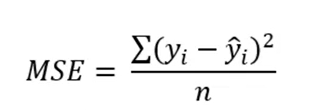

In [101]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse};\nRMSE: {rmse}')

MSE: 461012998.29720056;
RMSE: 21471.21324697793


In [103]:
np.random.seed(4587)
modelo = Prophet(yearly_seasonality = True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods = 150, freq = 'D')
previsao = modelo.predict(futuro)

12:07:27 - cmdstanpy - INFO - Chain [1] start processing
12:07:28 - cmdstanpy - INFO - Chain [1] done processing


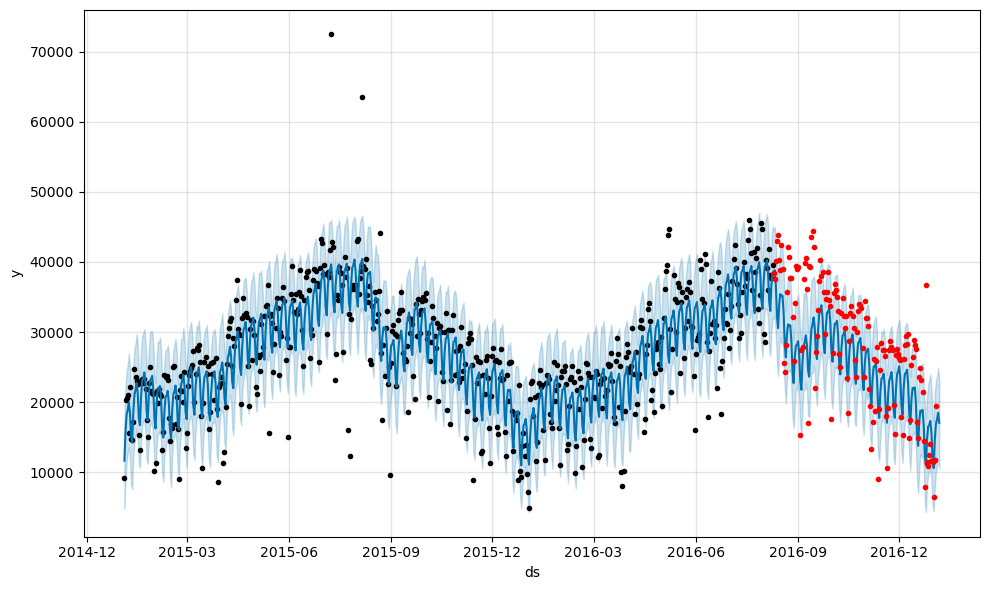

In [105]:
modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\T-Gamer\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

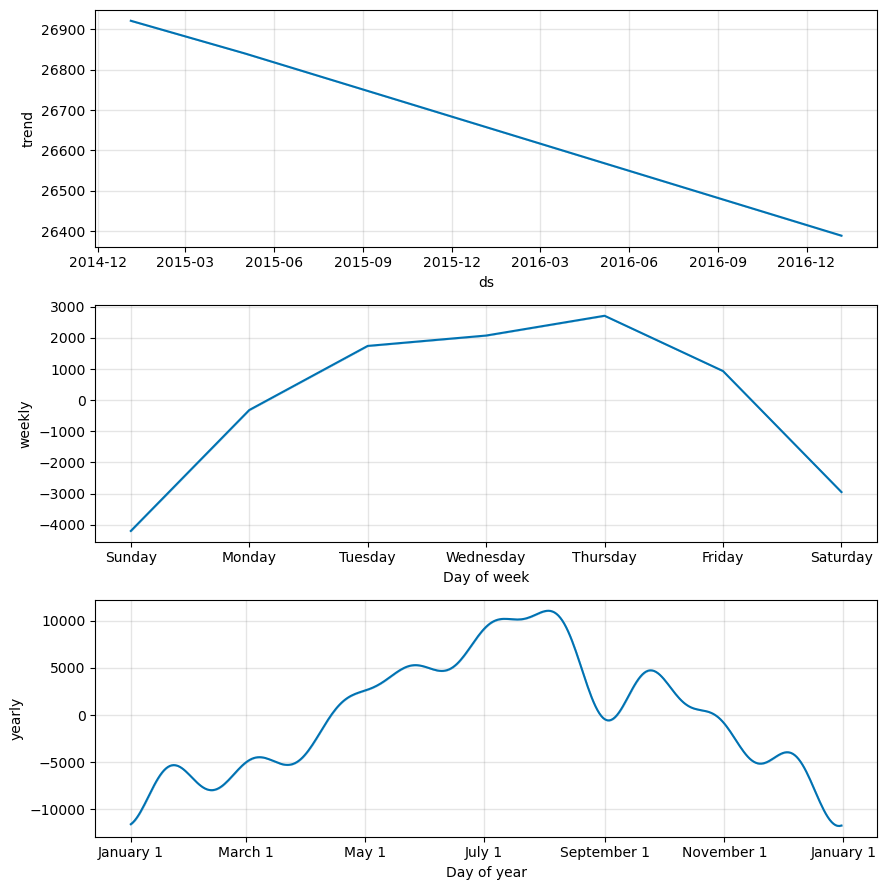

In [106]:
fig2 = modelo.plot_components(previsao)

In [107]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse};\nRMSE: {rmse}')

MSE: 38023258.39534487;
RMSE: 6166.3002193653265


In [108]:
df_prophet

ds      y
0   2015-01-04   9234
1   2015-01-05  20372
2   2015-01-06  20613
3   2015-01-07  21064
4   2015-01-08  15601
..         ...    ...
725 2016-12-30  11566
726 2016-12-31  11424
727 2017-01-01   6421
728 2017-01-02  11823
729 2017-01-03  19436

[730 rows x 2 columns]

In [112]:
#identificando quartis

Q1 = np.percentile(df_prophet['y'], 25)
Q2 = df_prophet['y'].median()
Q3 = np.percentile(df_prophet['y'], 75)
IQR = Q3 - Q1
lower = Q1 - (1.5*IQR) 
upper = Q3 + (1.5*IQR)

lower, upper

(4705.0, 50667.0)

In [132]:
for i in df_prophet['y']:
    if  i > upper or i < lower:
        df_prophet.loc[]

72504
63468


In [127]:
df_prophet.index

RangeIndex(start=0, stop=730, step=1)

In [153]:
df_limpo_prophet = df_prophet.drop(df_prophet.loc[(df_prophet['y']>upper)|(df_prophet['y']<lower)].index).copy()
df_limpo_prophet.shape, df_prophet.shape

((728, 2), (730, 2))

In [157]:
df_limpo_prophet.shape[0]*0.8

582.4

In [158]:
df_treino_2 = pd.DataFrame()

df_treino_2['ds'] = df_limpo_prophet['ds'][:582]
df_treino_2['y'] = df_limpo_prophet['y'][:582]

df_teste_2 = pd.DataFrame()

df_teste_2['ds'] = df_limpo_prophet['ds'][582:]
df_teste_2['y'] = df_limpo_prophet ['y'][582:]

In [160]:
np.random.seed(4587)
modelo = Prophet(yearly_seasonality = True)
modelo.fit(df_treino_2)
futuro = modelo.make_future_dataframe(periods = 150, freq = 'D')
previsao = modelo.predict(futuro)

12:48:04 - cmdstanpy - INFO - Chain [1] start processing
12:48:05 - cmdstanpy - INFO - Chain [1] done processing


In [192]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste_2, on='ds')

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse};\nRMSE: {rmse}')

MSE: 30155319.589215558;
RMSE: 5491.385944296354


Continuando com a aula

In [173]:
np.random.seed(4587)
modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods = 0)
previsao = modelo.predict(futuro)

12:54:33 - cmdstanpy - INFO - Chain [1] start processing
12:54:33 - cmdstanpy - INFO - Chain [1] done processing


In [174]:

sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

sem_outliers

ds      y
0   2015-01-04   9234
1   2015-01-05  20372
2   2015-01-06  20613
3   2015-01-07  21064
4   2015-01-08  15601
..         ...    ...
725 2016-12-30  11566
726 2016-12-31  11424
727 2017-01-01   6421
728 2017-01-02  11823
729 2017-01-03  19436

[631 rows x 2 columns]

In [175]:
sem_outliers.shape[0]*0.8

504.8

In [181]:
df_treino_3 = pd.DataFrame()

df_treino_3['ds'] = sem_outliers['ds'][:505]
df_treino_3['y'] = sem_outliers['y'][:505]

df_teste_3 = pd.DataFrame()

df_teste_3['ds'] = sem_outliers['ds'][505:]
df_teste_3['y'] = sem_outliers ['y'][505:]

In [188]:
np.random.seed(4587)
modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino_3)
futuro = modelo_sem_outliers.make_future_dataframe(periods = 150, freq = 'D')
previsao = modelo_sem_outliers.predict(futuro)

13:02:36 - cmdstanpy - INFO - Chain [1] start processing
13:02:36 - cmdstanpy - INFO - Chain [1] done processing


In [189]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste_3, on='ds')

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse};\nRMSE: {rmse}')

MSE: 15478875.733726533;
RMSE: 3934.3202378208275


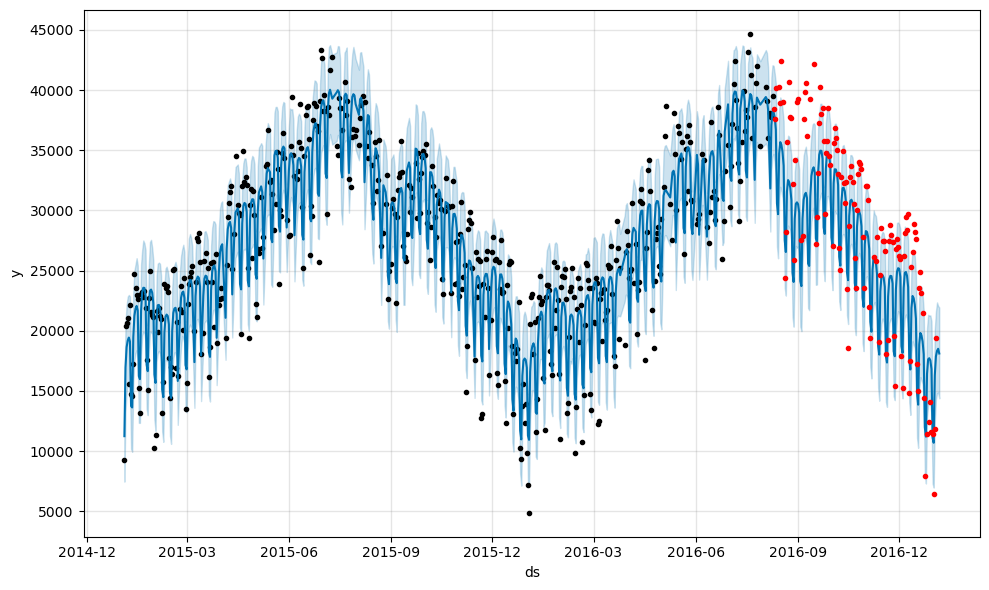

In [191]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste_3['ds'], df_teste_3['y'], '.r')

C:\Users\T-Gamer\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


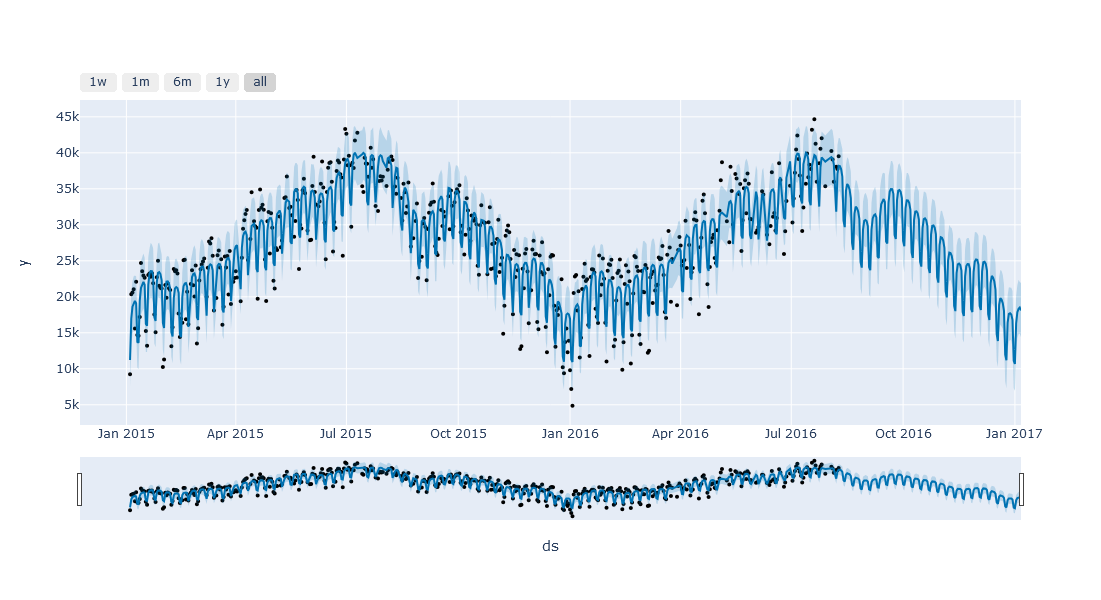

In [193]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(modelo_sem_outliers, previsao)


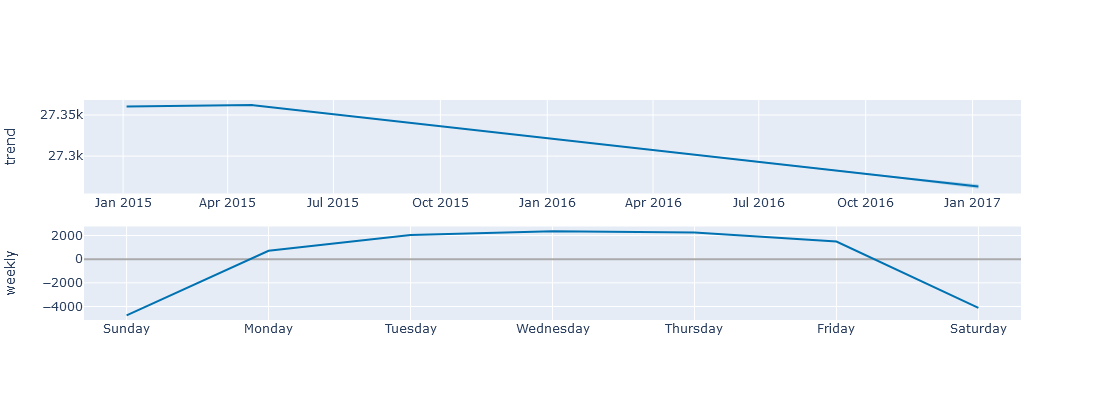

In [199]:
plot_components_plotly(modelo, previsao)


In [203]:
np.random.seed(4587)
modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino_3)
futuro = modelo_sem_outliers.make_future_dataframe(periods = 365, freq = 'D')
previsao = modelo_sem_outliers.predict(futuro)

13:12:11 - cmdstanpy - INFO - Chain [1] start processing
13:12:11 - cmdstanpy - INFO - Chain [1] done processing


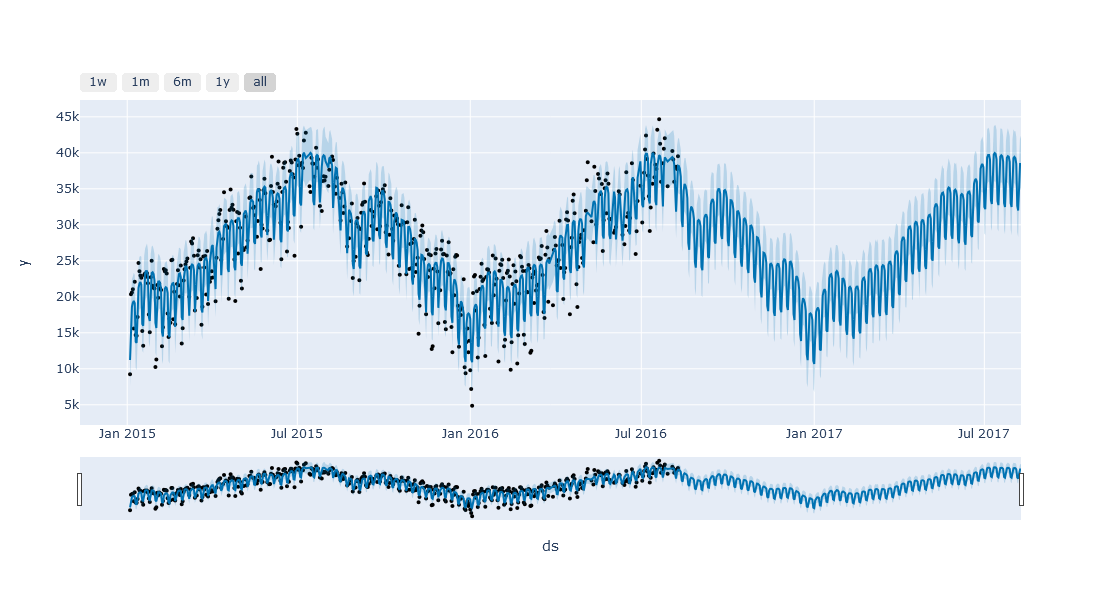

In [204]:
plot_plotly(modelo_sem_outliers, previsao)